## Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 

Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.


Suggestion: follow the below plan of action:

* Get familiar with the data
* Select columns of interest
* Decide what to do with NaNs

* Make processing plan
* Develop code that works with a sample

* Adjust the code to work with Big data
* Test big data approach on a sample

* Run program with big data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


In [3]:
path_to_searches = './searches.csv.bz2'
sample = pd.read_csv(path_to_searches,sep='^',nrows=10000, parse_dates=['Date'])
sample_cols= sample[['Destination','Date']]
print(sample.head())
print(sample_cols)
print(sample_cols.shape)

        Date      Time TxnCode                          OfficeID Country  \
0 2013-01-01  20:25:57     MPT  624d8c3ac0b3a7ca03e3c167e0f48327      DE   
1 2013-01-01  10:15:33     MPT  b0af35b31588dc4ab06d5cf2986e8e02      MD   
2 2013-01-01  18:04:49     MPT  3561a60621de06ab1badc8ca55699ef3      US   
3 2013-01-01  17:42:40     FXP  1864e5e8013d9414150e91d26b6a558b      SE   
4 2013-01-01  17:48:29     MPT  1ec336348f44207d2e0027dc3a68c118      NO   

  Origin Destination  RoundTrip  NbSegments Seg1Departure      ...        \
0    TXL         AUH          1           2           TXL      ...         
1    ATH         MIL          0           1           ATH      ...         
2    ICT         SFO          1           2           ICT      ...         
3    RNB         ARN          0           1           RNB      ...         
4    OSL         MAD          1           2           OSL      ...         

  Seg6Arrival Seg6Date Seg6Carrier Seg6BookingCode    From IsPublishedForNeg  \
0     

In [40]:
list(sample)

['Date',
 'Time',
 'TxnCode',
 'OfficeID',
 'Country',
 'Origin',
 'Destination',
 'RoundTrip',
 'NbSegments',
 'Seg1Departure',
 'Seg1Arrival',
 'Seg1Date',
 'Seg1Carrier',
 'Seg1BookingCode',
 'Seg2Departure',
 'Seg2Arrival',
 'Seg2Date',
 'Seg2Carrier',
 'Seg2BookingCode',
 'Seg3Departure',
 'Seg3Arrival',
 'Seg3Date',
 'Seg3Carrier',
 'Seg3BookingCode',
 'Seg4Departure',
 'Seg4Arrival',
 'Seg4Date',
 'Seg4Carrier',
 'Seg4BookingCode',
 'Seg5Departure',
 'Seg5Arrival',
 'Seg5Date',
 'Seg5Carrier',
 'Seg5BookingCode',
 'Seg6Departure',
 'Seg6Arrival',
 'Seg6Date',
 'Seg6Carrier',
 'Seg6BookingCode',
 'From',
 'IsPublishedForNeg',
 'IsFromInternet',
 'IsFromVista',
 'TerminalID',
 'InternetOffice']

## Select the columns of interest

## Make processing plan


* Filter Mad, Bcn, Agp
* Create YYYY-MM column
* Group by [destination, YYYY-MM]
* Sum
* Plot the results



### filter out the the searches for MAD, BCN, AGP

Take only the rows having MAD, BCN or AGP as destination

In [14]:
sample_mad = sample['Destination'] == 'MAD' 
sample_bcn = sample['Destination'] == 'BCN'
sample_agp = sample['Destination'] == 'AGP'
sample_tot = sample[sample_mad | sample_bcn | sample_agp]



,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL
93,2013-01-01,20:15:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,FRA,AGP,1,2,FRA,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
113,2013-01-01,23:40:53,FXX,0028c46214bc260eb3011510a898cd42,ES,ALC,BCN,0,2,ALC,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,f024768c26f020e6243423f932c2a4de,MAD
147,2013-01-01,15:35:53,MPT,63d35a15724f95939e6d0dd0ca39be16,DE,HHN,AGP,0,1,HHN,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BRE
151,2013-01-01,10:46:21,MPT,50c54b52322080d2c257390f714f91bd,ES,FRA,MAD,0,1,FRA,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
165,2013-01-01,03:40:25,MPT,f4b923424d840c9128df27b5242feffa,US,SFO,BCN,1,2,SFO,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
177,2013-01-01,11:26:34,MPT,3ac5426dd4f6bb8de28349c7b77e1ee4,IT,MOW,BCN,1,2,MOW,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MIL
186,2013-01-01,09:46:07,MPT,61880d6e0141d7ec9659ef77e29aab01,DK,CPH,BCN,1,2,CPH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CPH
188,2013-01-01,02:07:17,CAL,b9c9a14cb66d19de74865613593d2e95,MA,NDR,BCN,1,2,NDR,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,CAS
208,2013-01-01,15:58:35,FFP,99a5fa66a00828db9727aea7ebc6ae74,DE,CGN,BCN,1,2,CGN,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,BER


### Otro método es df.isin(['Mad','bcn','agp'])

In [16]:
madbcnagp = sample_cols['Destination'].isin(['MAD','BCN','AGP'])
of_interest = sample_cols[madbcnagp]
of_interest.head()

,Destination,Date
4,MAD,2013-01-01
93,AGP,2013-01-01
113,BCN,2013-01-01
147,AGP,2013-01-01
151,MAD,2013-01-01


We need to get the month from the Date column

We cannot use a datetime function on 'date' column as it is string

Options:

* Using string and obtaining yyyy-mm directly from it

* Transforming string to date:      

  * parse_dates=['Date'] - in csv_read function

  * pd.to_datetime  - function

### Option 1) use directly pd.to_datetime()

In [46]:
#pasamos el parse_dates=['Date] en el csv_read:
import datetime
type(sample['Date'][3])
as_dates= pd.to_datetime(of_interest['Date'])
datetimes[2]

Timestamp('2013-01-01 00:00:00')

In [61]:
#creamos columna month (de dos maneras)
of_interest['Month'] = as_dates.dt.month
of_interest['Month'] = as_dates.apply(lambda dt : dt.month)

what do we have so far?

### Option 2) get PlotDate directly from the string

In [78]:
of_interest['PlotDate'] = of_interest['Date'].str[:7]
of_interest

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Destination,Date,PlotDate
4,MAD,2013-01-01,2013-01
93,AGP,2013-01-01,2013-01
113,BCN,2013-01-01,2013-01
147,AGP,2013-01-01,2013-01
151,MAD,2013-01-01,2013-01
165,BCN,2013-01-01,2013-01
177,BCN,2013-01-01,2013-01
186,BCN,2013-01-01,2013-01
188,BCN,2013-01-01,2013-01
208,BCN,2013-01-01,2013-01


## group by arr_port search month

In [79]:
searches_per_airportmonth = of_interest.groupby(['Destination','PlotDate']).count()
searches_per_airportmonth


Date
Destination PlotDate      
AGP         2013-01    169
            2013-02    147
            2013-03    187
            2013-04     31
BCN         2013-01    517
            2013-02    497
            2013-03    536
            2013-04    174
MAD         2013-01    425
            2013-02    400
            2013-03    433
            2013-04    147

In [80]:
searches_per_airportmonth.reset_index()


,Destination,PlotDate,Date
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517
5,BCN,2013-02,497
6,BCN,2013-03,536
7,BCN,2013-04,174
8,MAD,2013-01,425
9,MAD,2013-02,400


Again.....What do we have?


In [84]:
sample = pd.read_csv('./searches.csv.bz2', sep='^',nrows=100000)
sample_cols =sample[['Destination','Date']]
madbcnagp = sample_cols['Destination'].isin(['MAD','BCN','AGP'])
of_interest= sample_cols[madbcnagp]
of_interest['PlotDate'] = of_interest['Date'].str[:7]
searches_per_airportmonth = of_interest.groupby(['Destination','PlotDate']).count()
unstacked = searches_per_airportmonth.reset_index()
unstacked.columns = ['Destination','PlotDate','Searches']

unstacked

/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Destination,PlotDate,Searches
0,AGP,2013-01,169
1,AGP,2013-02,147
2,AGP,2013-03,187
3,AGP,2013-04,31
4,BCN,2013-01,517
5,BCN,2013-02,497
6,BCN,2013-03,536
7,BCN,2013-04,174
8,MAD,2013-01,425
9,MAD,2013-02,400


In [86]:
readcsv = pd.read_csv('./searches.csv.bz2', sep='^',chunksize=500000)
counter=0
partial_results = []
for chunk in readcsv:
    chunk_cols =chunk[['Destination','Date']]
    madbcnagp = chunk_cols['Destination'].isin(['MAD','BCN','AGP'])
    of_interest= chunk_cols[madbcnagp]
    of_interest['PlotDate'] = of_interest['Date'].str[:7]
    searches_per_airportmonth = of_interest.groupby(['Destination','PlotDate']).count()
    unstacked = searches_per_airportmonth.reset_index()
    unstacked.columns = ['Destination','PlotDate','Searches']
    partial_results.append(unstacked)
    print(counter)
    counter+=1
    


/home/dsc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/dsc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0
1


/home/dsc/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (40,41,42,44) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


In [96]:
partial_results[5]

,Destination,PlotDate,Searches
0,AGP,2013-01,338
1,AGP,2013-02,294
2,AGP,2013-03,374
3,AGP,2013-04,290
4,AGP,2013-05,232
5,AGP,2013-06,139
6,AGP,2013-07,156
7,AGP,2013-08,138
8,AGP,2013-09,143
9,AGP,2013-10,115


In [107]:
consolidated = pd.concat(partial_results)
aggregated = consolidated.groupby(['Destination','PlotDate']).sum()
aggregated

Searches
Destination PlotDate          
AGP         2013-01       9633
            2013-02       8379
            2013-03      10659
            2013-04       8265
            2013-05      10830
            2013-06       7923
            2013-07       8892
            2013-08       7866
            2013-09       8151
            2013-10       6499
            2013-11       6384
            2013-12       3696
BCN         2013-01      29469
            2013-02      28329
            2013-03      30552
            2013-04      31236
            2013-05      28728
            2013-06      26505
            2013-07      29241
            2013-08      27075
            2013-09      23427
            2013-10      20276
            2013-11      19824
            2013-12      15400
MAD         2013-01      24258
            2013-02      22800
            2013-03      24681
            2013-04      25251
            2013-05      26334
            2013-06      22800
            2013-07      22971
            2013-08      21831
            2013-09      21147
            2013-10      22294
            2013-11      20272
            2013-12      14504

IndexError: list index out of range

## 4.3 Plotting

In [112]:
reseted =aggregated.reset_index()
pivoted = reseted.pivot(index='PlotDate', columns = 'Destination')
pivoted

Searches              
Destination      AGP    BCN    MAD
PlotDate                          
2013-01         9633  29469  24258
2013-02         8379  28329  22800
2013-03        10659  30552  24681
2013-04         8265  31236  25251
2013-05        10830  28728  26334
2013-06         7923  26505  22800
2013-07         8892  29241  22971
2013-08         7866  27075  21831
2013-09         8151  23427  21147
2013-10         6499  20276  22294
2013-11         6384  19824  20272
2013-12         3696  15400  14504

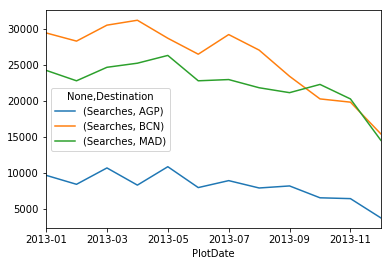

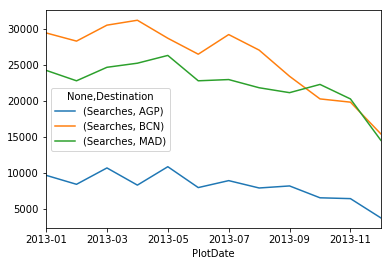

In [114]:
pivoted.plot()

plt.show()

## 5) Adjust the code to work with Big data